In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from isaac.visualization import plot_lineplot_with_paper_style

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
directory = "cell_type_choice_plots/"

# Mass training plots

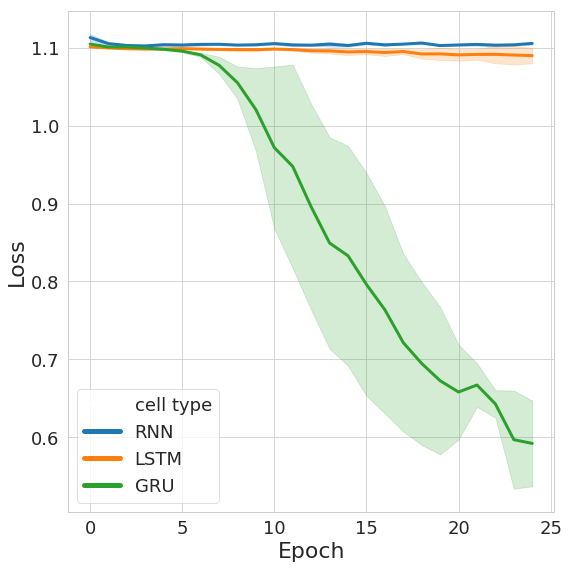

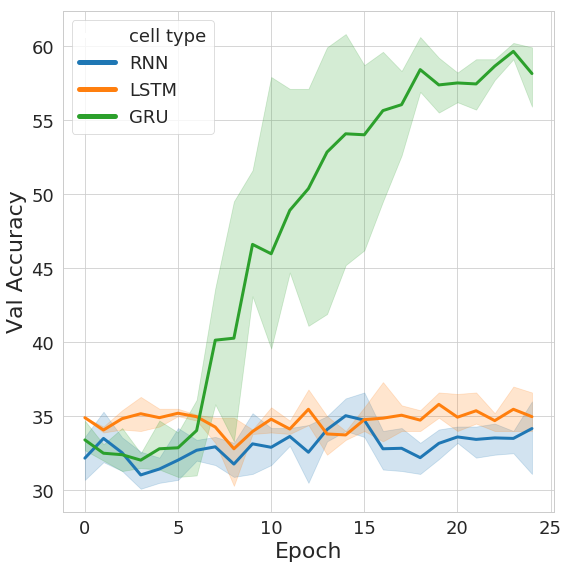

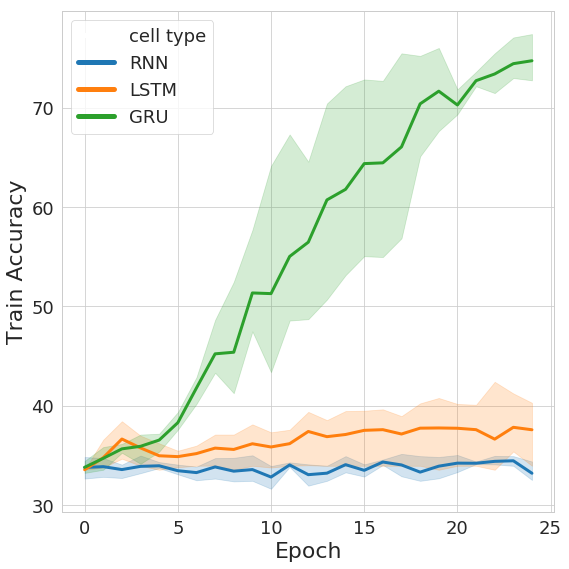

In [4]:
question_type = "mass"

stats = pd.read_hdf(directory+question_type+"_stats.h5")
stats = stats.rename({"cell_type": "cell type"}, axis="columns")

ax = plot_lineplot_with_paper_style(directory+question_type+"_losses.pdf", 
                                    x="Epoch", y="Loss", hue="cell type",
                                    markers=True, data=stats, hue_order=["RNN", "LSTM", "GRU"], ci="sd")

plt.show()

ax = plot_lineplot_with_paper_style(directory+question_type+"_all_val_acc_plot.pdf", 
                                    x="Epoch", y="Val Accuracy", hue="cell type", 
                                    data=stats, hue_order=["RNN", "LSTM", "GRU"])
plt.show()
ax = plot_lineplot_with_paper_style(directory+question_type+"_all_train_acc_plot.pdf", 
                                    x="Epoch", y="Train Accuracy", hue="cell type", 
                                    data=stats, hue_order=["RNN", "LSTM", "GRU"])

In [5]:
seeds = ([0 for _ in range(25)] + [42 for _ in range(25)] + [72 for _ in range(25)]) * 3
stats["seed"] = seeds

for cell_name, cell_df in stats.groupby("cell type"):
    cell_accuracies = []
    for _, seed_df in cell_df.groupby("seed"):
        cell_accuracies.append(seed_df["Val Accuracy"].max())
    
    print(cell_name, np.mean(cell_accuracies), np.std(cell_accuracies))

GRU 60.333333333333336 0.5249338582674528
LSTM 36.56666666666667 0.713364485301088
RNN 35.5 0.8602325267042633


# Force training plots

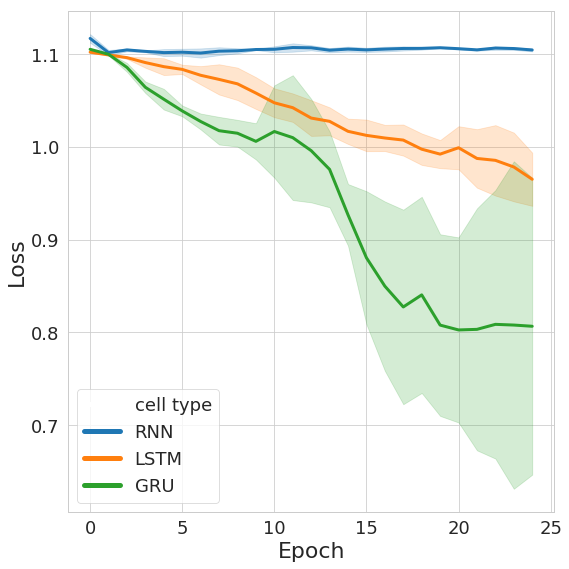

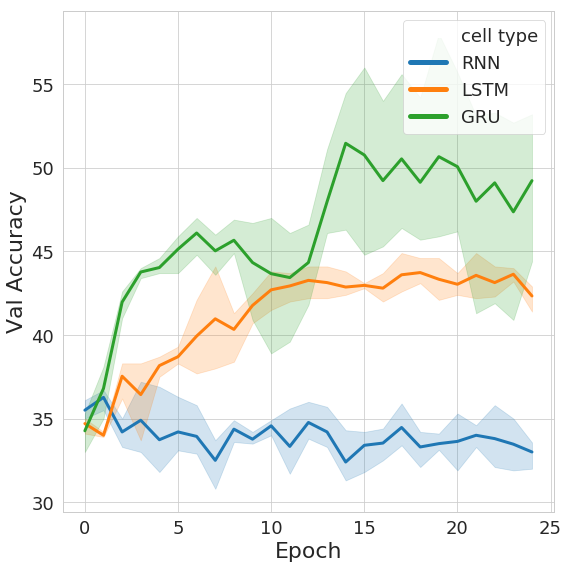

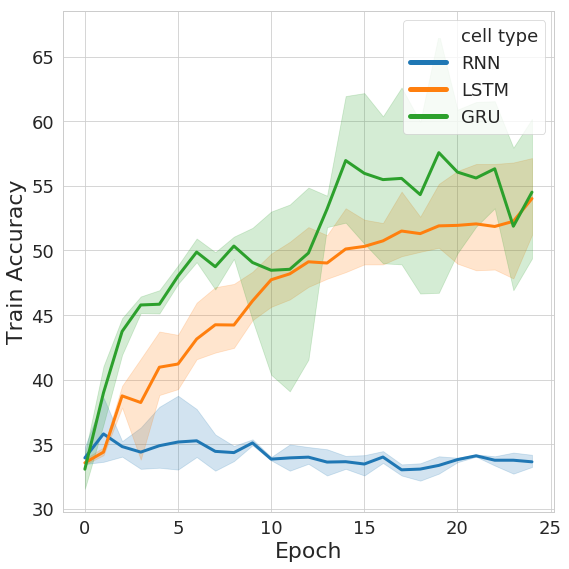

In [6]:
question_type = "force"

stats = pd.read_hdf(directory+question_type+"_stats.h5")
stats = stats.rename({"cell_type": "cell type"}, axis="columns")

ax = plot_lineplot_with_paper_style(directory+question_type+"_losses.pdf", 
                                    x="Epoch", y="Loss", hue="cell type",
                                    markers=True, data=stats, hue_order=["RNN", "LSTM", "GRU"], ci="sd")

plt.show()

ax = plot_lineplot_with_paper_style(directory+question_type+"_all_val_acc_plot.pdf", 
                                    x="Epoch", y="Val Accuracy", hue="cell type", 
                                    data=stats, hue_order=["RNN", "LSTM", "GRU"])
plt.show()
ax = plot_lineplot_with_paper_style(directory+question_type+"_all_train_acc_plot.pdf", 
                                    x="Epoch", y="Train Accuracy", hue="cell type", 
                                    data=stats, hue_order=["RNN", "LSTM", "GRU"])

In [7]:
seeds = ([0 for _ in range(25)] + [42 for _ in range(25)] + [72 for _ in range(25)]) * 3
stats["seed"] = seeds

for cell_name, cell_df in stats.groupby("cell type"):
    cell_accuracies = []
    for _, seed_df in cell_df.groupby("seed"):
        cell_accuracies.append(seed_df["Val Accuracy"].max())
    
    print(cell_name, np.mean(cell_accuracies), np.std(cell_accuracies))

GRU 52.96666666666667 4.043375927228246
LSTM 44.5 0.3741657386773937
RNN 36.63333333333333 0.4496912521077353
